In [103]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
national_poll_on_healthy_aging_npha = fetch_ucirepo(id=936)

# data (as pandas dataframes)
X = national_poll_on_healthy_aging_npha.data.features
y = national_poll_on_healthy_aging_npha.data.targets

# metadata
print(national_poll_on_healthy_aging_npha.metadata)

# variable information
print(national_poll_on_healthy_aging_npha.variables)



{'uci_id': 936, 'name': 'National Poll on Healthy Aging (NPHA)', 'repository_url': 'https://archive.ics.uci.edu/dataset/936/national+poll+on+healthy+aging+(npha)', 'data_url': 'https://archive.ics.uci.edu/static/public/936/data.csv', 'abstract': 'This is a subset of the NPHA dataset filtered down to develop and validate machine learning algorithms for predicting the number of doctors a survey respondent sees in a year. This dataset’s records represent seniors who responded to the NPHA survey.\n', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 714, 'num_features': 14, 'feature_types': ['Categorical'], 'demographics': ['Age', 'Race', 'Gender'], 'target_col': ['Number_of_Doctors_Visited'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2017, 'last_updated': 'Mon Dec 11 2023', 'dataset_doi': 'https://doi.org/10.3886/ICPSR37305.v1', 'creators': [], 'intro_paper': {'title'

In [104]:
new_column_names = {'Stress_Keeps_Patient_from_Sleeping': 'Stress_Sleeping', 'Medication_Keeps_Patient_from_Sleeping': 'Medication_Sleeping', 'Pain_Keeps_Patient_from_Sleeping': 'Pain_Sleeping', 'Bathroom_Needs_Keeps_Patient_from_Sleeping': 'Bathroom_Sleeping', 'Uknown_Keeps_Patient_from_Sleeping': 'Unknown_Sleeping', 'Prescription_Sleep_Medication': 'Sleep_Meds'}
df = pd.DataFrame(X)
X_newnames = df.rename(columns=new_column_names)

print(X_newnames.dtypes)
print(y.dtypes)

Age                    int64
Physical_Health        int64
Mental_Health          int64
Dental_Health          int64
Employment             int64
Stress_Sleeping        int64
Medication_Sleeping    int64
Pain_Sleeping          int64
Bathroom_Sleeping      int64
Unknown_Sleeping       int64
Trouble_Sleeping       int64
Sleep_Meds             int64
Race                   int64
Gender                 int64
dtype: object
Number_of_Doctors_Visited    int64
dtype: object


In [105]:
columns_to_convert = ['Age', 'Physical_Health', 'Mental_Health', 'Dental_Health', 'Employment', 'Stress_Sleeping', 'Medication_Sleeping', 'Pain_Sleeping', 'Bathroom_Sleeping', 'Unknown_Sleeping', 'Trouble_Sleeping', 'Sleep_Meds', 'Race', 'Gender']
for column in columns_to_convert:
    X_newnames[column] = X_newnames[column].astype('category')

columns_to_convert = ['Number_of_Doctors_Visited']
for column in columns_to_convert:
  y[column] = y[column].astype('category')

print(X_newnames.dtypes)

Age                    category
Physical_Health        category
Mental_Health          category
Dental_Health          category
Employment             category
Stress_Sleeping        category
Medication_Sleeping    category
Pain_Sleeping          category
Bathroom_Sleeping      category
Unknown_Sleeping       category
Trouble_Sleeping       category
Sleep_Meds             category
Race                   category
Gender                 category
dtype: object


<ipython-input-105-964fc5913384>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = y[column].astype('category')


In [106]:
X_newnames.head()

,Age,Physical_Health,Mental_Health,Dental_Health,Employment,Stress_Sleeping,Medication_Sleeping,Pain_Sleeping,Bathroom_Sleeping,Unknown_Sleeping,Trouble_Sleeping,Sleep_Meds,Race,Gender
0,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,2,3,3,3,3,1,0,0,0,0,2,3,1,2


In [107]:
def rename_responses(df, column_name, new_responses):
    df[column_name] = df[column_name].replace(new_responses)
    return df

df = y
column_name = 'Number_of_Doctors_Visited'
new_responses = {1: "0-1 visits", 2: '2-3 visits', 3: '4 or more visits'}

y = rename_responses(df, column_name, new_responses)

print(y.head())

  Number_of_Doctors_Visited
0          4 or more visits
1                2-3 visits
2          4 or more visits
3                0-1 visits
4          4 or more visits


<ipython-input-107-5ad73607fafa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].replace(new_responses)


In [108]:
df = X_newnames
column_name = 'Age'
new_responses = {1: '50-64', 2: '65-80'}

X_newnames = rename_responses(df, column_name, new_responses)
print(X_newnames.head())

     Age Physical_Health Mental_Health Dental_Health Employment  \
0  65-80               4             3             3          3   
1  65-80               4             2             3          3   
2  65-80               3             2             3          3   
3  65-80               3             2             3          3   
4  65-80               3             3             3          3   

  Stress_Sleeping Medication_Sleeping Pain_Sleeping Bathroom_Sleeping  \
0               0                   0             0                 0   
1               1                   0             0                 1   
2               0                   0             0                 0   
3               0                   0             0                 1   
4               1                   0             0                 0   

  Unknown_Sleeping Trouble_Sleeping Sleep_Meds Race Gender  
0                1                2          3    1      2  
1                0                3 

In [109]:
df = X_newnames
column_name = 'Physical_Health'
new_responses = {-1: 'Refused', 1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}

X_newnames = rename_responses(df, column_name, new_responses)
print(X_newnames.head())

     Age Physical_Health Mental_Health Dental_Health Employment  \
0  65-80            Fair             3             3          3   
1  65-80            Fair             2             3          3   
2  65-80            Good             2             3          3   
3  65-80            Good             2             3          3   
4  65-80            Good             3             3          3   

  Stress_Sleeping Medication_Sleeping Pain_Sleeping Bathroom_Sleeping  \
0               0                   0             0                 0   
1               1                   0             0                 1   
2               0                   0             0                 0   
3               0                   0             0                 1   
4               1                   0             0                 0   

  Unknown_Sleeping Trouble_Sleeping Sleep_Meds Race Gender  
0                1                2          3    1      2  
1                0                3 

In [110]:
df = X_newnames
column_name = 'Mental_Health'
new_responses = {-1: 'Refused', 1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}

X_newnames = rename_responses(df, column_name, new_responses)
print(X_newnames.head())

     Age Physical_Health Mental_Health Dental_Health Employment  \
0  65-80            Fair          Good             3          3   
1  65-80            Fair     Very Good             3          3   
2  65-80            Good     Very Good             3          3   
3  65-80            Good     Very Good             3          3   
4  65-80            Good          Good             3          3   

  Stress_Sleeping Medication_Sleeping Pain_Sleeping Bathroom_Sleeping  \
0               0                   0             0                 0   
1               1                   0             0                 1   
2               0                   0             0                 0   
3               0                   0             0                 1   
4               1                   0             0                 0   

  Unknown_Sleeping Trouble_Sleeping Sleep_Meds Race Gender  
0                1                2          3    1      2  
1                0                3 

In [111]:
df = X_newnames
column_name = 'Dental_Health'
new_responses = {-1: 'Refused', 1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor', 6: 'Unknown'}
X_newnames = rename_responses(df, column_name, new_responses)
print(X_newnames.head())

     Age Physical_Health Mental_Health Dental_Health Employment  \
0  65-80            Fair          Good          Good          3   
1  65-80            Fair     Very Good          Good          3   
2  65-80            Good     Very Good          Good          3   
3  65-80            Good     Very Good          Good          3   
4  65-80            Good          Good          Good          3   

  Stress_Sleeping Medication_Sleeping Pain_Sleeping Bathroom_Sleeping  \
0               0                   0             0                 0   
1               1                   0             0                 1   
2               0                   0             0                 0   
3               0                   0             0                 1   
4               1                   0             0                 0   

  Unknown_Sleeping Trouble_Sleeping Sleep_Meds Race Gender  
0                1                2          3    1      2  
1                0                3 

In [112]:
df = X_newnames
column_name = 'Employment'
new_responses = {-1: 'Refused', 1: 'Full-Time', 2: 'Part-Time', 3: 'Retired', 4: 'Not Working'}
X_newnames = rename_responses(df, column_name, new_responses)
print(X_newnames.head())

     Age Physical_Health Mental_Health Dental_Health Employment  \
0  65-80            Fair          Good          Good    Retired   
1  65-80            Fair     Very Good          Good    Retired   
2  65-80            Good     Very Good          Good    Retired   
3  65-80            Good     Very Good          Good    Retired   
4  65-80            Good          Good          Good    Retired   

  Stress_Sleeping Medication_Sleeping Pain_Sleeping Bathroom_Sleeping  \
0               0                   0             0                 0   
1               1                   0             0                 1   
2               0                   0             0                 0   
3               0                   0             0                 1   
4               1                   0             0                 0   

  Unknown_Sleeping Trouble_Sleeping Sleep_Meds Race Gender  
0                1                2          3    1      2  
1                0                3 

In [113]:
df = X_newnames
column_name = 'Stress_Sleeping'
new_responses = {0: 'No', 1: 'Yes'}
X_newnames = rename_responses(df, column_name, new_responses)
print(X_newnames.head())

     Age Physical_Health Mental_Health Dental_Health Employment  \
0  65-80            Fair          Good          Good    Retired   
1  65-80            Fair     Very Good          Good    Retired   
2  65-80            Good     Very Good          Good    Retired   
3  65-80            Good     Very Good          Good    Retired   
4  65-80            Good          Good          Good    Retired   

  Stress_Sleeping Medication_Sleeping Pain_Sleeping Bathroom_Sleeping  \
0              No                   0             0                 0   
1             Yes                   0             0                 1   
2              No                   0             0                 0   
3              No                   0             0                 1   
4             Yes                   0             0                 0   

  Unknown_Sleeping Trouble_Sleeping Sleep_Meds Race Gender  
0                1                2          3    1      2  
1                0                3 

In [114]:
df = X_newnames
column_name = 'Medication_Sleeping'
new_responses = {0: 'No', 1: 'Yes'}
X_newnames = rename_responses(df, column_name, new_responses)
print(X_newnames.head())

     Age Physical_Health Mental_Health Dental_Health Employment  \
0  65-80            Fair          Good          Good    Retired   
1  65-80            Fair     Very Good          Good    Retired   
2  65-80            Good     Very Good          Good    Retired   
3  65-80            Good     Very Good          Good    Retired   
4  65-80            Good          Good          Good    Retired   

  Stress_Sleeping Medication_Sleeping Pain_Sleeping Bathroom_Sleeping  \
0              No                  No             0                 0   
1             Yes                  No             0                 1   
2              No                  No             0                 0   
3              No                  No             0                 1   
4             Yes                  No             0                 0   

  Unknown_Sleeping Trouble_Sleeping Sleep_Meds Race Gender  
0                1                2          3    1      2  
1                0                3 

In [115]:
df = X_newnames
column_name = 'Pain_Sleeping'
new_responses = {0: 'No', 1: 'Yes'}
X_newnames = rename_responses(df, column_name, new_responses)
print(X_newnames.head())

     Age Physical_Health Mental_Health Dental_Health Employment  \
0  65-80            Fair          Good          Good    Retired   
1  65-80            Fair     Very Good          Good    Retired   
2  65-80            Good     Very Good          Good    Retired   
3  65-80            Good     Very Good          Good    Retired   
4  65-80            Good          Good          Good    Retired   

  Stress_Sleeping Medication_Sleeping Pain_Sleeping Bathroom_Sleeping  \
0              No                  No            No                 0   
1             Yes                  No            No                 1   
2              No                  No            No                 0   
3              No                  No            No                 1   
4             Yes                  No            No                 0   

  Unknown_Sleeping Trouble_Sleeping Sleep_Meds Race Gender  
0                1                2          3    1      2  
1                0                3 

In [116]:
df = X_newnames
column_name = 'Bathroom_Sleeping'
new_responses = {0: 'No', 1: 'Yes'}
X_newnames = rename_responses(df, column_name, new_responses)
print(X_newnames.head())

     Age Physical_Health Mental_Health Dental_Health Employment  \
0  65-80            Fair          Good          Good    Retired   
1  65-80            Fair     Very Good          Good    Retired   
2  65-80            Good     Very Good          Good    Retired   
3  65-80            Good     Very Good          Good    Retired   
4  65-80            Good          Good          Good    Retired   

  Stress_Sleeping Medication_Sleeping Pain_Sleeping Bathroom_Sleeping  \
0              No                  No            No                No   
1             Yes                  No            No               Yes   
2              No                  No            No                No   
3              No                  No            No               Yes   
4             Yes                  No            No                No   

  Unknown_Sleeping Trouble_Sleeping Sleep_Meds Race Gender  
0                1                2          3    1      2  
1                0                3 

In [117]:
df = X_newnames
column_name = 'Unknown_Sleeping'
new_responses = {0: 'No', 1: 'Yes'}
X_newnames = rename_responses(df, column_name, new_responses)
print(X_newnames.head())

     Age Physical_Health Mental_Health Dental_Health Employment  \
0  65-80            Fair          Good          Good    Retired   
1  65-80            Fair     Very Good          Good    Retired   
2  65-80            Good     Very Good          Good    Retired   
3  65-80            Good     Very Good          Good    Retired   
4  65-80            Good          Good          Good    Retired   

  Stress_Sleeping Medication_Sleeping Pain_Sleeping Bathroom_Sleeping  \
0              No                  No            No                No   
1             Yes                  No            No               Yes   
2              No                  No            No                No   
3              No                  No            No               Yes   
4             Yes                  No            No                No   

  Unknown_Sleeping Trouble_Sleeping Sleep_Meds Race Gender  
0              Yes                2          3    1      2  
1               No                3 

In [118]:
df = X_newnames
column_name = 'Trouble_Sleeping'
new_responses = {-1: 'Refused', 1: '3-7 nights', 2: '1-2 nights', 3: '0 nights'}
X_newnames = rename_responses(df, column_name, new_responses)
print(X_newnames.head())

     Age Physical_Health Mental_Health Dental_Health Employment  \
0  65-80            Fair          Good          Good    Retired   
1  65-80            Fair     Very Good          Good    Retired   
2  65-80            Good     Very Good          Good    Retired   
3  65-80            Good     Very Good          Good    Retired   
4  65-80            Good          Good          Good    Retired   

  Stress_Sleeping Medication_Sleeping Pain_Sleeping Bathroom_Sleeping  \
0              No                  No            No                No   
1             Yes                  No            No               Yes   
2              No                  No            No                No   
3              No                  No            No               Yes   
4             Yes                  No            No                No   

  Unknown_Sleeping Trouble_Sleeping Sleep_Meds Race Gender  
0              Yes       1-2 nights          3    1      2  
1               No         0 nights 

In [119]:
df = X_newnames
column_name = 'Sleep_Meds'
new_responses = {-1: 'Refused', 1: 'Regularly', 2: 'Occasionally', 3: 'Do Not Use'}
X_newnames = rename_responses(df, column_name, new_responses)
print(X_newnames.head())

     Age Physical_Health Mental_Health Dental_Health Employment  \
0  65-80            Fair          Good          Good    Retired   
1  65-80            Fair     Very Good          Good    Retired   
2  65-80            Good     Very Good          Good    Retired   
3  65-80            Good     Very Good          Good    Retired   
4  65-80            Good          Good          Good    Retired   

  Stress_Sleeping Medication_Sleeping Pain_Sleeping Bathroom_Sleeping  \
0              No                  No            No                No   
1             Yes                  No            No               Yes   
2              No                  No            No                No   
3              No                  No            No               Yes   
4             Yes                  No            No                No   

  Unknown_Sleeping Trouble_Sleeping  Sleep_Meds Race Gender  
0              Yes       1-2 nights  Do Not Use    1      2  
1               No         0 night

In [120]:
df = X_newnames
column_name = 'Race'
new_responses = {-1: 'Refused', 1: 'White (Non-Hispanic)', 2: 'Black (Non-Hispanic)', 3: 'Other(Non-Hispanic)', 4: 'Hispanic', 5: '2+ Races (Non-Hispanic)'}
X_newnames = rename_responses(df, column_name, new_responses)
print(X_newnames.head())

     Age Physical_Health Mental_Health Dental_Health Employment  \
0  65-80            Fair          Good          Good    Retired   
1  65-80            Fair     Very Good          Good    Retired   
2  65-80            Good     Very Good          Good    Retired   
3  65-80            Good     Very Good          Good    Retired   
4  65-80            Good          Good          Good    Retired   

  Stress_Sleeping Medication_Sleeping Pain_Sleeping Bathroom_Sleeping  \
0              No                  No            No                No   
1             Yes                  No            No               Yes   
2              No                  No            No                No   
3              No                  No            No               Yes   
4             Yes                  No            No                No   

  Unknown_Sleeping Trouble_Sleeping  Sleep_Meds                  Race Gender  
0              Yes       1-2 nights  Do Not Use  White (Non-Hispanic)      2  


In [121]:
df = X_newnames
column_name = 'Gender'
new_responses = {-1: 'Refused', 1: 'Male', 2: 'Female'}
X_newnames = rename_responses(df, column_name, new_responses)
print(X_newnames.head())

     Age Physical_Health Mental_Health Dental_Health Employment  \
0  65-80            Fair          Good          Good    Retired   
1  65-80            Fair     Very Good          Good    Retired   
2  65-80            Good     Very Good          Good    Retired   
3  65-80            Good     Very Good          Good    Retired   
4  65-80            Good          Good          Good    Retired   

  Stress_Sleeping Medication_Sleeping Pain_Sleeping Bathroom_Sleeping  \
0              No                  No            No                No   
1             Yes                  No            No               Yes   
2              No                  No            No                No   
3              No                  No            No               Yes   
4             Yes                  No            No                No   

  Unknown_Sleeping Trouble_Sleeping  Sleep_Meds                  Race  Gender  
0              Yes       1-2 nights  Do Not Use  White (Non-Hispanic)  Female 

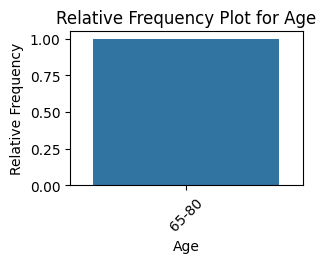

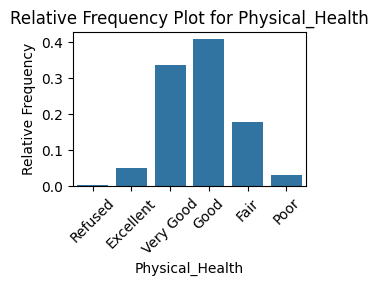

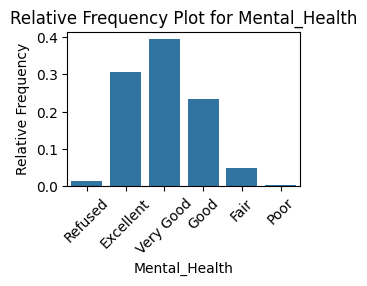

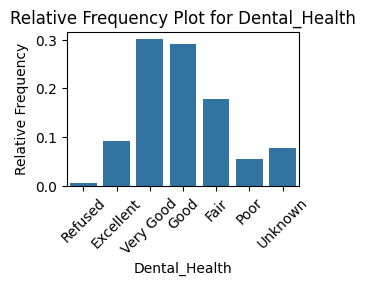

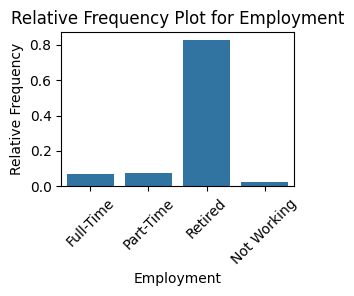

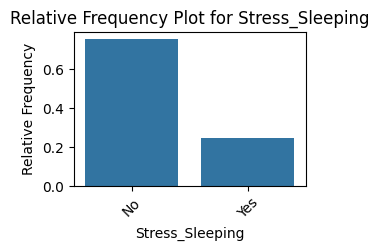

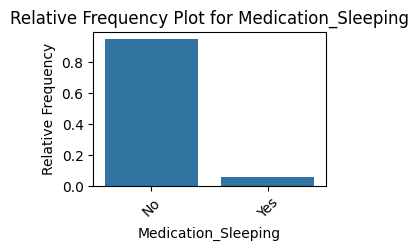

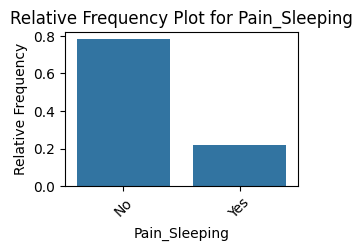

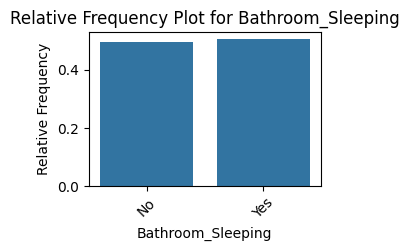

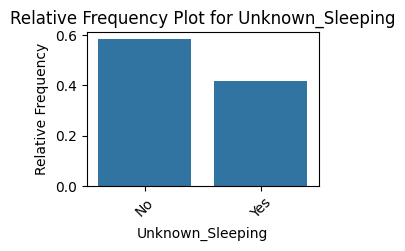

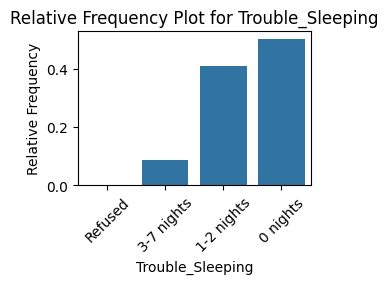

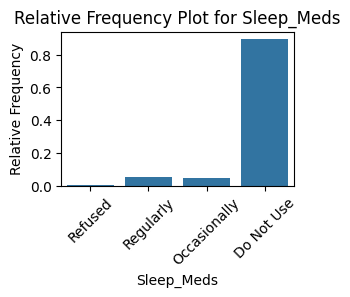

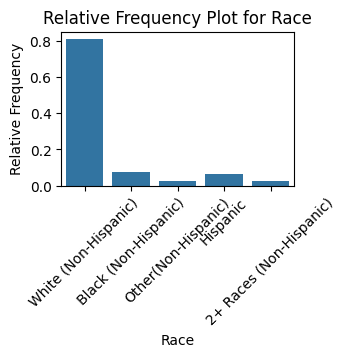

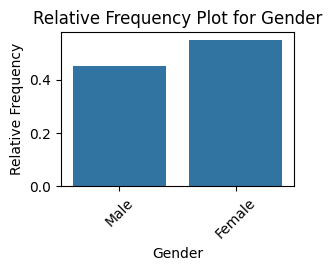

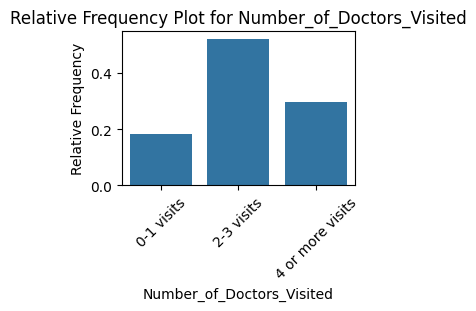

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

def relative_frequency_plot(df):

  for column in df.columns:
    if df[column].dtype == 'category':
      relative_frequencies = df[column].value_counts(normalize=True)
      plt.figure(figsize=(3, 2))
      sns.barplot(x=relative_frequencies.index, y=relative_frequencies.values)
      plt.title(f'Relative Frequency Plot for {column}')
      plt.xlabel(column)
      plt.ylabel('Relative Frequency')
      plt.xticks(rotation=45)
      plt.show()


relative_frequency_plot(X_newnames)
relative_frequency_plot(y)

In [123]:
!pip install ydata_profiling

from ydata_profiling import ProfileReport
import pandas as pd
from google.colab import files
import IPython.display

profile = ProfileReport(X_newnames, title="Pandas Profiling Report")
profile.to_file("Variables_Profile_Report.html")

files.download("Variables_Profile_Report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [124]:
profile_y = ProfileReport(y, title="Target Pandas Profiling Report")
profile_y.to_file("Target_Profile_Report.html")

files.download('Target_Profile_Report.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>